In [30]:
# Warming Up
import pandas as pd
import numpy as np
from random import randrange

fPath = './data/vgsales.csv'
df = pd.read_csv(fPath)

# trying to create 1.5% worth of duplicates
rws = df.shape[0]
col = df.shape[1]
rwRtio = int(.015 * rws) # float is truncated

print('Number of instances before duplication = %d' % (rws))

def eenyMeeny():
     # select a random row
    tg = df.iloc[randrange(0, rws)]
    # return randomly selected row
    return tg

for i in range(rwRtio):
    df = df.append(eenyMeeny(), ignore_index=True)
rws = df.shape[0]

print('Number of instances after duplication = %d' % (rws))
print('Number of attributes = %d' % (col))
print(df.head())

248
Number of instances = 16598
Number of attributes = 11
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


### Missing Values

In [ ]:
data = df.replace('?',np.NaN)

print('Number of instances = %d' % (rws))
print('Number of attributes = %d' % (col))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

In [ ]:
print('Number of rows in original data = %d' % (rws))
df = df.dropna()
print('Number of rows after discarding missing values = %d' % (df.shape[0]))
print('Difference in number of rows = %d' % (rws-df.shape[0]))
# update rws
rws = df.shape[0]

### Outliers

In [ ]:
pass

### Duplicat Data

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

### Discretization

#### Step 1: Plotting the Histogram and Value Counts for Global Sales

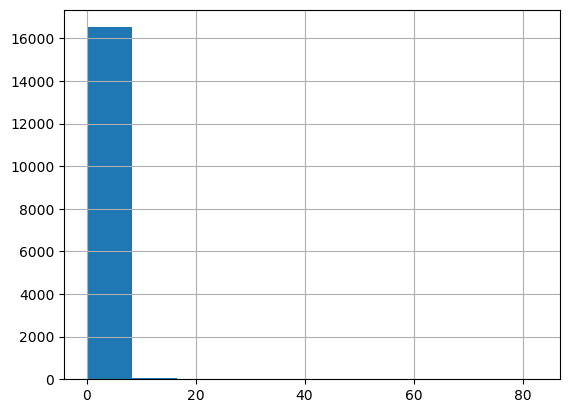

82.74       1
40.24       1
35.82       1
33.00       1
31.37       1
         ... 
0.05      632
0.04      645
0.03      811
0.02     1071
0.01      618
Name: Global_Sales, Length: 623, dtype: int64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

"""
Step 1: Plots a histogram for the Global Sales
This histogram visually represents the distribution of global sales values across all video games in the dataset.
Count the frequency of each Global Sales value
This prints out the number of occurrences of each unique global sales value, providing insight into the common sales figures
"""

# Load the dataset
fPath = './data/vgsales.csv'
df = pd.read_csv(fPath)

# Plot a histogram for the Global Sales
df['Global_Sales'].hist(bins=10)
plt.show()

# Count the frequency of each Global Sales value
print(df['Global_Sales'].value_counts(sort=False))

#### Step 2: Equal Width Discretization

In [9]:
"""
Step 2: 
Equal Width Discretization into 4 bins
This method divides the range of Global Sales into 4 bins of equal interval widths, categorizing the continuous sales data into discrete intervals.
"""

# Equal Width Discretization into 4 bins
bins_equal_width = pd.cut(df['Global_Sales'], 4)
print(bins_equal_width.value_counts(sort=False))

(-0.0727, 20.692]    16580
(20.692, 41.375]        17
(41.375, 62.057]         0
(62.057, 82.74]          1
Name: Global_Sales, dtype: int64


#### Step 3: Equal Frequency Discretization

In [10]:
"""
Step 3:
Equal Frequency Discretization into 4 bins
This method divides the Global Sales data into 4 bins such that each bin contains approximately the same number of records, ensuring an even distribution across bins
"""
# Equal Frequency Discretization into 4 bins
bins_equal_freq = pd.qcut(df['Global_Sales'], 4)
print(bins_equal_freq.value_counts(sort=False))

(0.009000000000000001, 0.06]    4354
(0.06, 0.17]                    4038
(0.17, 0.47]                    4060
(0.47, 82.74]                   4146
Name: Global_Sales, dtype: int64
